In [1]:
%reset
%matplotlib inline

import netCDF4 as nc
import cmocean
import numpy as np
import xarray as xr
import xrft
from xgcm import Grid
import matplotlib.pyplot as plt
import scipy.interpolate

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [7]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/
fs = xr.open_dataset('static.nc', decode_times=False)
av = xr.open_dataset('averages_00004502.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_25
fs_25 = xr.open_dataset('static.nc', decode_times=False)
av_25 = xr.open_dataset('averages_00000002.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_15
fs_15 = xr.open_dataset('static.nc', decode_times=False)
av_15 = xr.open_dataset('averages_00000002.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_10
fs_10 = xr.open_dataset('static.nc', decode_times=False)
av_10 = xr.open_dataset('averages_00000002.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_5
fs_5 = xr.open_dataset('static.nc', decode_times=False)
av_5 = xr.open_dataset('averages_00000002.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_2
fs_2 = xr.open_dataset('static.nc', decode_times=False)
av_2 = xr.open_dataset('averages_00000002.nc', decode_times=False)

#Nora's tests with using SSU and SSV for surface velocities rather than first layer as I was doing.
%cd /glade/p/univ/unyu0004/noraloose/NeverWorld2/nw2_0.125deg_N15_baseline
fs_SSbaseline = xr.open_dataset('static.nc', decode_times=False)
av_SSbaseline = xr.open_dataset('averages_00002502.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/noraloose/NeverWorld2/nw2_0.125deg_QGL_2
fs_SS2 = xr.open_dataset('static.nc', decode_times=False)
av_SS2 = xr.open_dataset('averages_00000002.nc', decode_times=False)


%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_25
/glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_15
/glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_10
/glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_5
/glade/p/univ/unyu0004/eyankovsky/QGLeith_runs/nw2_0.125deg_QGL_2
/glade/p/univ/unyu0004/noraloose/NeverWorld2/nw2_0.125deg_N15_baseline
/glade/p/univ/unyu0004/noraloose/NeverWorld2/nw2_0.125deg_QGL_2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [8]:
print(av_10)

<xarray.Dataset>
Dimensions:              (nv: 2, time: 20, xh: 480, xq: 481, yh: 1120, yq: 1121, zi: 16, zl: 15)
Coordinates:
  * xq                   (xq) float64 0.0 0.125 0.25 0.375 ... 59.75 59.88 60.0
  * yh                   (yh) float64 -69.94 -69.81 -69.69 ... 69.69 69.81 69.94
  * zl                   (zl) float64 1.023e+03 1.023e+03 ... 1.028e+03
  * time                 (time) float64 2.5 7.5 12.5 17.5 ... 87.5 92.5 97.5
  * nv                   (nv) float64 1.0 2.0
  * xh                   (xh) float64 0.0625 0.1875 0.3125 ... 59.69 59.81 59.94
  * yq                   (yq) float64 -70.0 -69.88 -69.75 ... 69.75 69.88 70.0
  * zi                   (zi) float64 1.022e+03 1.023e+03 ... 1.028e+03
Data variables:
    h_du_dt              (time, zl, yh, xq) float32 ...
    h_dv_dt              (time, zl, yq, xh) float32 ...
    h_diffu              (time, zl, yh, xq) float32 ...
    h_diffv              (time, zl, yq, xh) float32 ...
    h_du_dt_visc         (time, zl, yh, xq) f

In [10]:
grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});

#Interpolating surface u,v to be on the same grid points. Using only 100 days, or 20 time steps:
dx= grid.interp(fs.dxCu,axis='X'); dy= grid.interp(fs.dyCv,axis='Y')
u = grid.interp(av.u[0:20,0,:,:],axis='X'); 
v = grid.interp(av.v[0:20,0,:,:],axis='Y')

u_2 = grid.interp(av_2.u[0:20,0,:,:],axis='X'); 
v_2 = grid.interp(av_2.v[0:20,0,:,:],axis='Y')

u_5 = grid.interp(av_5.u[0:20,0,:,:],axis='X'); 
v_5 = grid.interp(av_5.v[0:20,0,:,:],axis='Y')

u_10 = grid.interp(av_10.u[0:20,0,:,:],axis='X'); 
v_10 = grid.interp(av_10.v[0:20,0,:,:],axis='Y')

u_15 = grid.interp(av_15.u[0:20,0,:,:],axis='X'); 
v_15 = grid.interp(av_15.v[0:20,0,:,:],axis='Y')

u_25 = grid.interp(av_25.u[0:20,0,:,:],axis='X'); 
v_25 = grid.interp(av_25.v[0:20,0,:,:],axis='Y')

#Ld = av_003125.Rd1[:].mean('time')

In [11]:
print(u.shape,v.shape)
print(u_5.shape,v_5.shape)

(20, 1120, 480) (20, 1120, 480)
(20, 1120, 480) (20, 1120, 480)


In [44]:
# u_SS2 = grid.interp(av_SS2.SSU[0:20,:,:],axis='X'); 
# v_SS2 = grid.interp(av_SS2.SSV[0:20,:,:],axis='Y')

u_SSbaseline = grid.interp(av_SSbaseline.SSU[0:20,:,:],axis='X'); 
v_SSbaseline = grid.interp(av_SSbaseline.SSV[0:20,:,:],axis='Y')

u_SSbaseline_test = grid.interp(av_SSbaseline.u[0:20,0,:,:],axis='X'); 
v_SSbaseline_test = grid.interp(av_SSbaseline.v[0:20,0,:,:],axis='Y')



In [45]:
u_SSbaseline_test.shape

(20, 1120, 480)

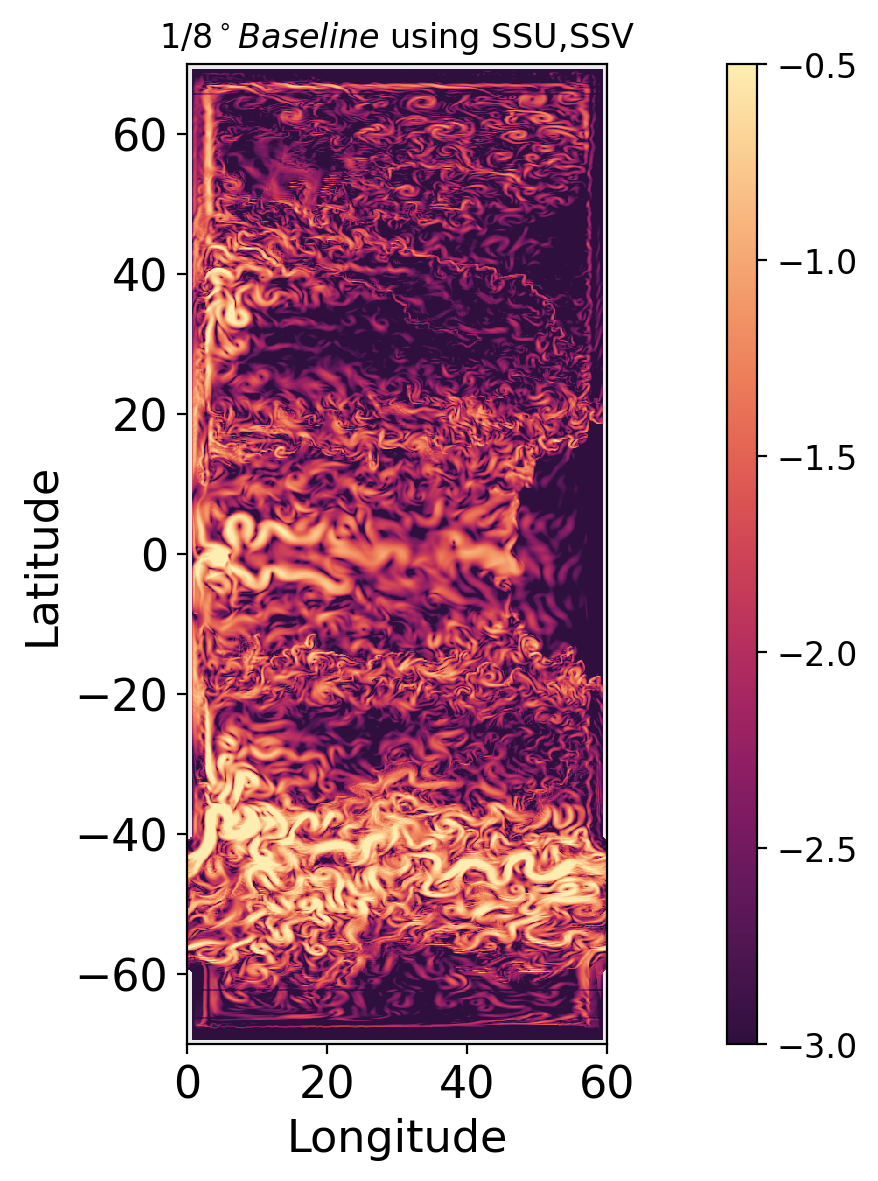

In [48]:
#Plotting surface KE for whole domain @1/8 degree.
fig = plt.figure(figsize=(5, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('$1/8^\circ Baseline$ using SSU,SSV',fontsize=12)

KE=(u_SSbaseline**2+v_SSbaseline**2)*0.5
plotted =ax1.pcolor(fs.geolon,fs.geolat,np.log10(KE[-1,:]),cmap=cmocean.cm.matter_r,vmin=-.5,vmax=-3,shading='auto') #vmin=0,vmax=1e-1,
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

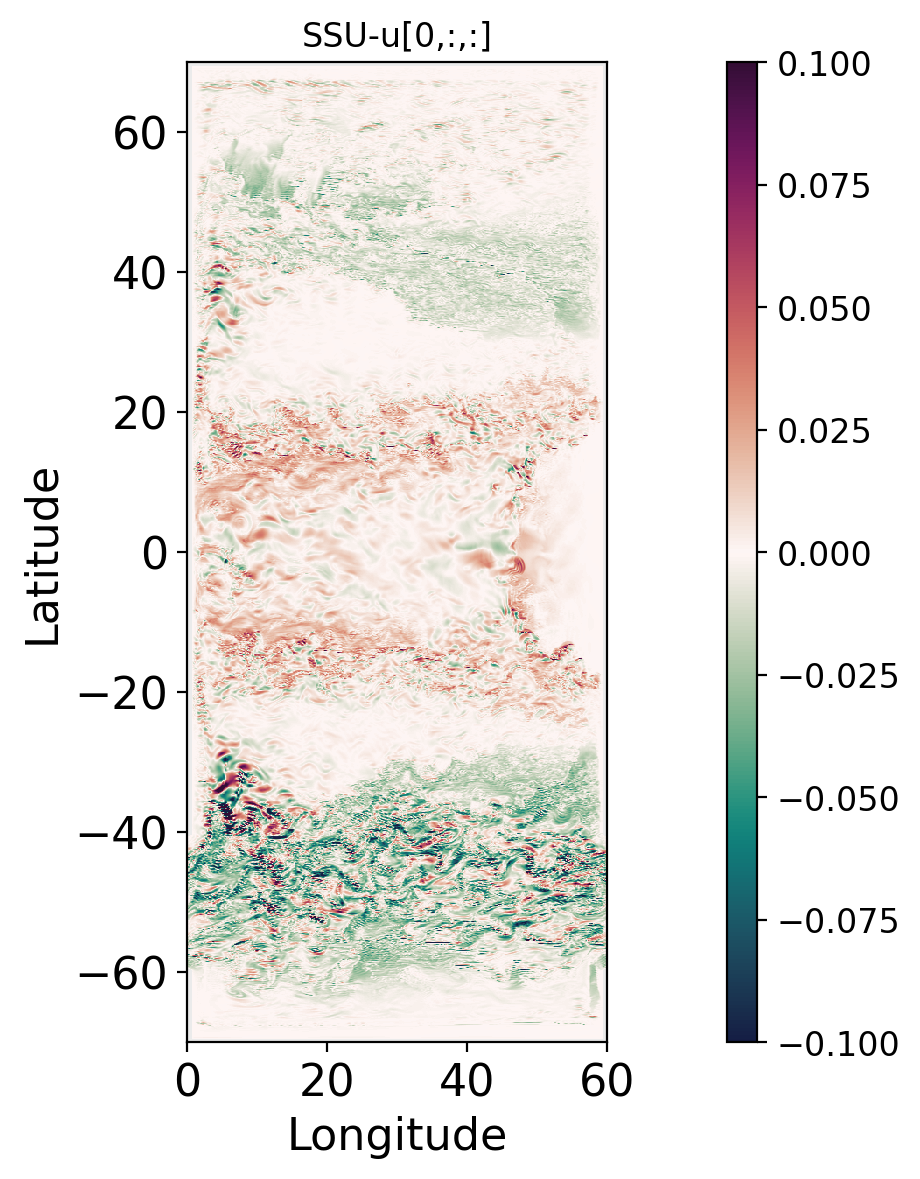

In [53]:
fig = plt.figure(figsize=(5, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('SSU-u[0,:,:]',fontsize=12)

u1=(u_SSbaseline)
u2=(u_SSbaseline_test)
plotted =ax1.pcolor(fs.geolon,fs.geolat,u1[-1,:,:]-u2[-1,:,:],cmap=cmocean.cm.curl,vmin=-1e-1,vmax=1e-1,shading='auto') #vmin=0,vmax=1e-1,
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

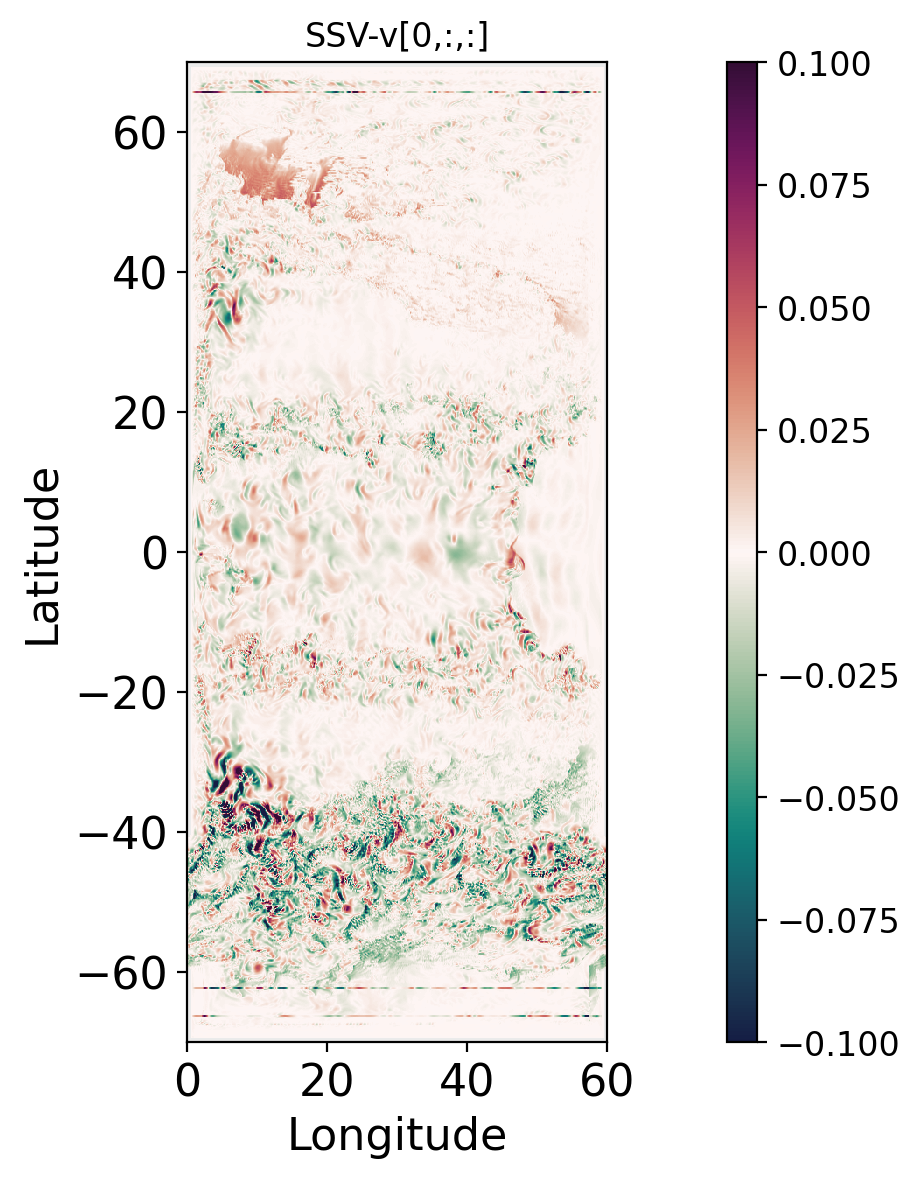

In [55]:
#Plotting surface KE for whole domain @1/8 degree.
fig = plt.figure(figsize=(5, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('SSV-v[0,:,:]',fontsize=12)

v1=(v_SSbaseline)
v2=(v_SSbaseline_test)
plotted =ax1.pcolor(fs.geolon,fs.geolat,v1[-1,:,:]-v2[-1,:,:],cmap=cmocean.cm.curl,vmin=-1e-1,vmax=1e-1,shading='auto') #vmin=0,vmax=1e-1,
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

In [35]:
KE2.shape

(20, 1120, 480)

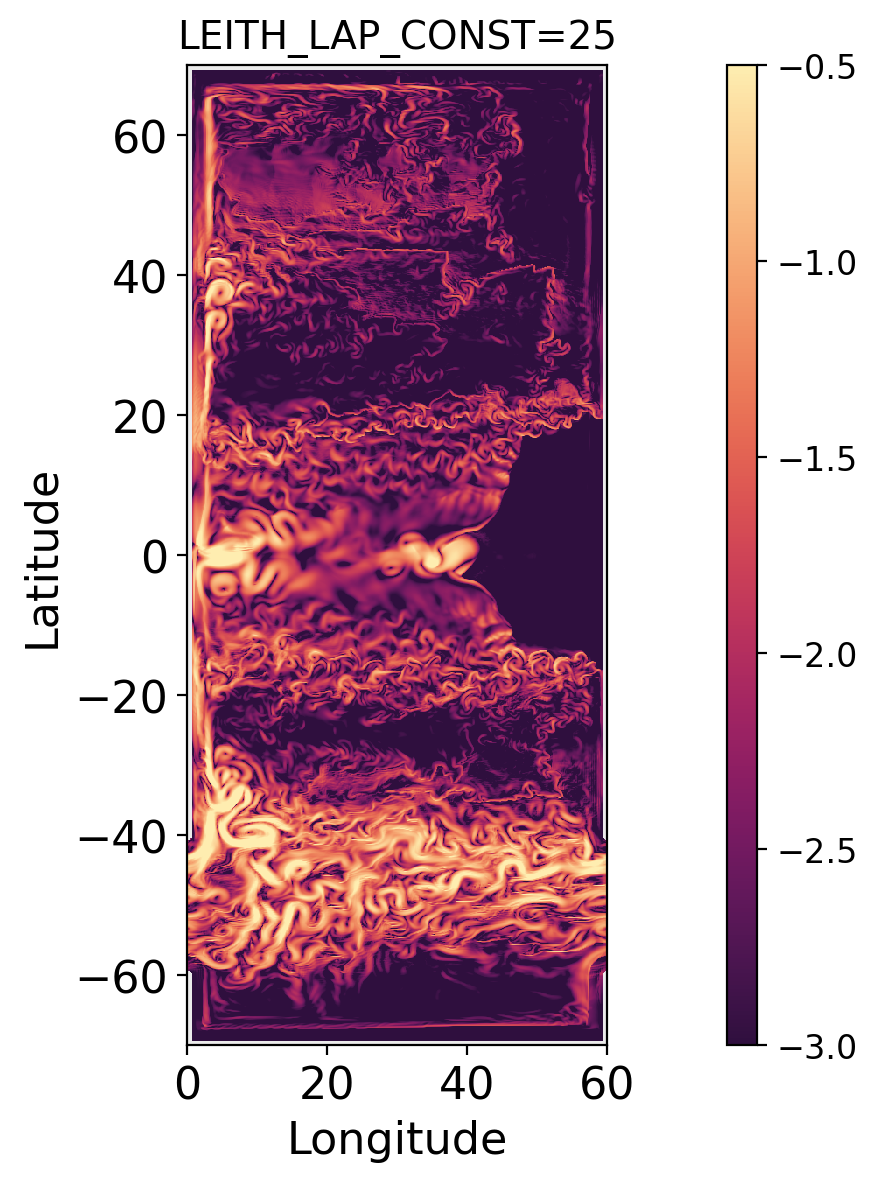

In [18]:
#Plotting surface KE for whole domain @1/32 degree.
fig = plt.figure(figsize=(5, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('LEITH_LAP_CONST=25',fontsize=14)

KE=(u_25**2+v_25**2)*0.5
plotted =ax1.pcolor(fs.geolon,fs.geolat,np.log10(KE[-1,:]),cmap=cmocean.cm.matter_r,vmin=-.5,vmax=-3,shading='auto') #vmin=0,vmax=1e-1,
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

## We will now change the x-coordinates to be in units of meters rather than degrees.

In [7]:
xi=dx.cumsum(axis=1)-dx[:,0] #subtract first dx so that we start at x=0m.

In [8]:
fs.geolat[640,0] #60 is 50 south
u.shape

(20, 1120, 480)

### Computing the 1D spectrum at 50 deg. North

In [67]:
boundary=20 #cutting this number of points off of each boundary. 
lim1=160
for i in range(lim1,lim1+1):
    xline= xi[i,boundary:-boundary]
    uline= u[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_0=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_0= (ekeiso_0.freq_xh*1e3*2*np.pi)       
    centroid_0 = np.nansum(ekeiso_0*wavenumber_0)/np.nansum(ekeiso_0)
    Ld_wavenumber = 1/(av.Rd1[:].mean('time').mean('xh')[i]/1000)
    
for i in range(lim1,lim1+1):
    uline= u_2[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_2[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_2=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_2= (ekeiso_2.freq_xh*1e3*2*np.pi)       
    centroid_2 = np.nansum(ekeiso_2*wavenumber_2)/np.nansum(ekeiso_2)

    
for i in range(lim1,lim1+1):
    uline= u_5[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_5[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_5=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_5= (ekeiso_5.freq_xh*1e3*2*np.pi)       
    centroid_5 = np.nansum(ekeiso_5*wavenumber_5)/np.nansum(ekeiso_5)
    
for i in range(lim1,lim1+1):
    uline= u_10[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_10[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_10=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_10= (ekeiso_10.freq_xh*1e3*2*np.pi)       
    centroid_10 = np.nansum(ekeiso_10*wavenumber_10)/np.nansum(ekeiso_10)
    
for i in range(lim1,lim1+1):
    uline= u_15[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_15[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_15=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_15= (ekeiso_15.freq_xh*1e3*2*np.pi)       
    centroid_15 = np.nansum(ekeiso_15*wavenumber_15)/np.nansum(ekeiso_15)
    
for i in range(lim1,lim1+1):
    uline= u_25[:,i,boundary:-boundary].fillna(0.); uline=uline.assign_coords(xh=xline) 
    vline= v_25[:,i,boundary:-boundary].fillna(0.); vline=vline.assign_coords(xh=xline)    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",window='hann', detrend='linear').compute()
    ekeiso = .5*(uiso2 + viso2).mean('time') #Computing the mean spectrum
    nk = int(len(ekeiso)/2.)

    ekeiso_25=ekeiso[nk+1:]    # half of the latitude array size
    wavenumber_25= (ekeiso_25.freq_xh*1e3*2*np.pi)       
    centroid_25 = np.nansum(ekeiso_25*wavenumber_25)/np.nansum(ekeiso_25)


Text(0, 0.5, '[m$^3$ s$^{-2}$]')

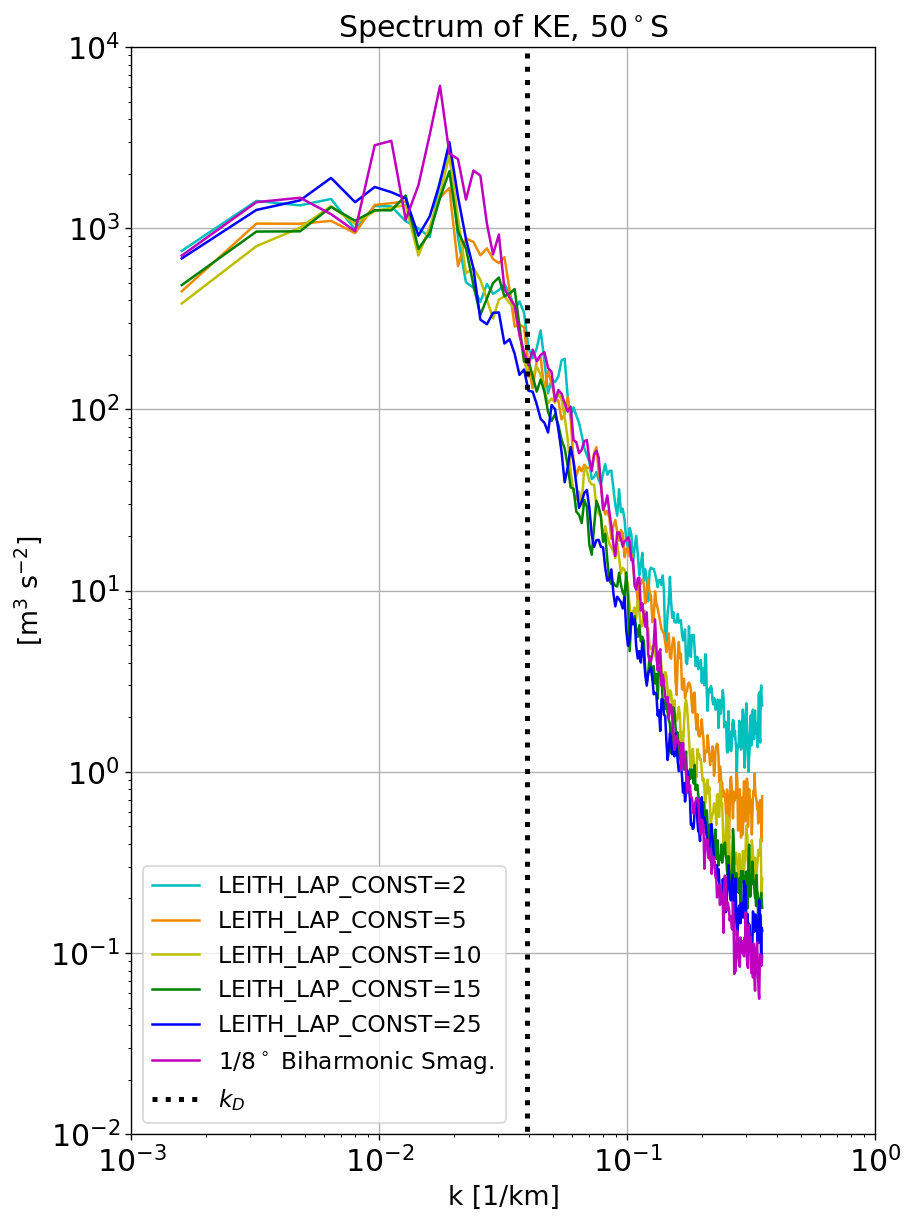

In [68]:
fig, ax = plt.subplots(figsize=(8,12),dpi=120)


plt.plot(wavenumber_2,ekeiso_2,color='c',label='LEITH_LAP_CONST=2 ')
plt.plot(wavenumber_5,ekeiso_5,color='#ED8B00',label='LEITH_LAP_CONST=5  ')
plt.plot(wavenumber_10,ekeiso_10,color='y',label='LEITH_LAP_CONST=10  ')
plt.plot(wavenumber_10,ekeiso_15,color='g',label='LEITH_LAP_CONST=15  ')
plt.plot(wavenumber_10,ekeiso_25,color='b',label='LEITH_LAP_CONST=25  ')
plt.plot(wavenumber_0,ekeiso_0,'-m',label='$1/8^\circ$ Biharmonic Smag.')

#plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$ = 1/(%.1f km)'%(1/Ld_wavenumber))
plt.plot([Ld_wavenumber,Ld_wavenumber], [1e-7,1e4],':k',linewidth=3,label='$k_D$')

plt.xscale('log')
plt.yscale('log')
plt.title('Spectrum of KE, 50$^\circ$S',fontsize=18)
plt.ylim([1e-2, 1e4]); plt.xlim([1e-3, 1e0])

plt.grid()
plt.xlabel('$\kappa_r (1/km)$')
plt.legend(fontsize=14,loc='lower left')

plt.tick_params(labelsize=18);
ax.set_xlabel(r'k [1/km]',fontsize=16)
ax.set_ylabel(r'[m$^3$ s$^{-2}$]',fontsize=16)
#ax.set_aspect('equal')